# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import mahotas as mt

### Reading the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\RAJEEV\Desktop\DataScience\Majorproject\Project\code\leaf_features.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,0,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,0,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,0,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,0,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
img_files = os.listdir(r"C:\Users\RAJEEV\Desktop\DataScience\Majorproject\Project\code\Train")

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [6]:
#breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

breakpoints = ['AG-S-001','AG-S-050', #0
               'AH-S-001','AH-S-056', #1
               'AI-S-004', 'AI-S-063', #2
               'AV-S-001','AV-S-123',  #3
               'BA-S-001','BA-S-103',  #4
               'BJ-S-001','BJ-S-034',  #5
               'CC-S-001','CC-S-075',  #6
               'CL-S-001','CL-S-057',  #7
               'FR-S-001', 'FR-S-063', #8
               'J-S-001','J-S-071',  #9
               'MI-S-001','MI-S-062', #13 mango
               'MK-S-001', 'MK-S-060', #10 #cury
               'MO-S-001','MO-S-077', #11 #drumstick
               'M-S-001', 'M-S-098',  #12
               'NA-S-001', 'NA-S-040', #14
               'OT-S-001','OT-S-052', #15
               'PG-S-001','PG-S-080', #16
               'SC-S-001', 'SC-S-039', #17
               'SJ-S-001','SJ-S-056' #18
              ]

In [7]:
target_list = []
for file in img_files:
    target_num = (file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [8]:
# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

In [9]:
y = np.array(target_list)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [10]:
X = dataset.iloc[:,1:]

In [11]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [12]:
y[0:5]

array([0, 0, 0, 0, 0])

### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
696,819788.0,3698.639947,1025,1015,1.009852,1.269078,16.687165,45.928115,58.537453,12.405293,55.822006,69.383294,28.062850,43.311497,0.995813,0.652087,5.936058
684,600318.5,3182.456180,955,914,1.044858,1.454011,16.871090,30.592784,39.256483,8.525418,47.908842,59.760543,25.502266,19.066587,0.998184,0.800205,4.277167
811,181340.5,2030.088651,449,758,0.592348,1.876812,22.726638,8.299845,11.424357,7.248509,28.302596,35.994630,25.923289,6.589730,0.998602,0.929617,1.552113
56,1001621.0,3917.001545,1341,1077,1.245125,1.441920,15.318071,48.957090,57.639641,46.593546,51.010884,57.424994,48.648915,46.592276,0.996318,0.625725,6.751028
1094,783621.5,3810.685761,1366,828,1.649758,1.443360,18.531046,43.017627,55.653026,23.764295,53.655369,67.382031,37.045614,26.876422,0.997319,0.674613,5.493838


In [14]:
y_train[0:5]

array([13, 13, 11,  1, 16])

### Feature Scaling

##### using standard scalar

In [15]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
X_train[0:2]

array([[ 1.01219932,  0.46905456, -0.21528807,  0.50820128, -0.48762668,
        -0.59816818, -0.47478876,  1.54601934,  1.71591184, -0.67165697,
         1.49822604,  1.75864091, -0.77196203,  0.27790727, -0.52469453,
        -1.35305388,  1.28737852],
       [-0.02760756, -0.20893927, -0.43422125,  0.07410847, -0.42839715,
        -0.38654626, -0.45284373,  0.18380122,  0.29218165, -1.13113534,
         0.57497002,  0.83507891, -1.1890659 , -0.73604385,  0.67702093,
         0.58779858, -0.12198433]])

In [17]:
y_train[0:2]

array([13, 13])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report




from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

###  naive bayes

In [53]:
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [54]:
y_prednb_test = nb.predict(X_test)
y_prednb_train = nb.predict(X_train)

In [55]:
print ("Accuracy on Training Data", nb.score(X_train, y_train))
print ("Accuracy on Test Data", nb.score(X_test, y_test))

Accuracy on Training Data 0.7717391304347826
Accuracy on Test Data 0.7415730337078652


### RF

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
train_pred_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [64]:
print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.8735955056179775


### DT

In [65]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train) 

In [66]:
y_pred_test_dtf = dt.predict(X_test)
y_pred_train_dtf = dt.predict(X_train)

In [67]:
print ("Accuracy on Training Data", dt.score(X_train, y_train))
print ("Accuracy on Test Data", dt.score(X_test, y_test))

Accuracy on Training Data 1.0
Accuracy on Test Data 0.7415730337078652


### gb

In [69]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(X_train, y_train)

# Prediction on test and train set
gb_pred_train = gb.predict(X_train)
gb_pred = gb.predict(X_test)

In [70]:
print("Training Accuracy: ",accuracy_score(y_train, gb_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Training Accuracy:  1.0
Test Accuracy:  0.848314606741573


### knn

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
knn_pred_train = knn.predict(X_train)
knn_pred = knn.predict(X_test)
print("Training Accuracy: ",accuracy_score(y_train, knn_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, knn_pred))

Training Accuracy:  1.0
Test Accuracy:  0.8286516853932584


In [74]:
from sklearn.model_selection import cross_val_score
accuracy_rate = [ ]
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, X_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

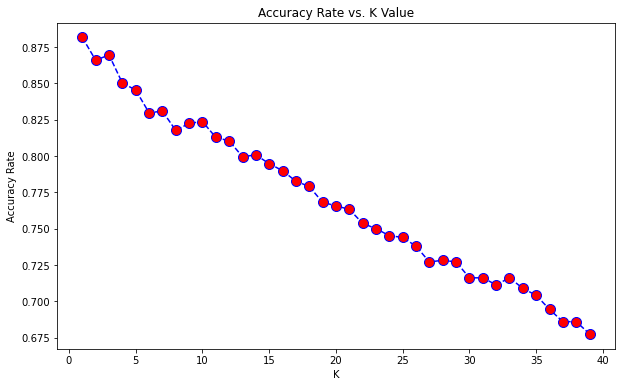

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [76]:
error_rate = [ ]
for i in range(1,40):
    k = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(k, X_train, y_train, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

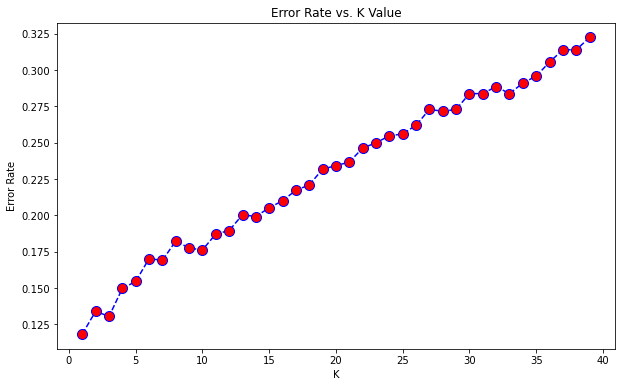

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### xg

In [79]:
xg = xgb.XGBClassifier()

# Training model
xg.fit(X_train, y_train)

C:\Users\RAJEEV\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xg_pred_train = xg.predict(X_train)
xg_pred = xg.predict(X_test)

In [82]:
print("Training Accuracy: ",accuracy_score(y_train, xg_pred_train))
print("Test Accuracy: ",accuracy_score(y_test, xg_pred))

Training Accuracy:  1.0
Test Accuracy:  0.851123595505618


### Applying SVM classifier model

In [20]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [21]:
y_pred = clf.predict(X_test)

In [83]:
import pickle
pickle.dump(clf, open("clf.pkl", 'wb'))

#### metrics

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.848314606741573

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.79      0.85      0.81        13
           2       0.88      0.94      0.91        16
           3       0.77      0.92      0.84        51
           4       0.91      0.91      0.91        32
           5       1.00      0.92      0.96        13
           6       0.86      0.95      0.90        20
           7       1.00      0.56      0.72        16
           8       0.74      0.82      0.78        17
           9       0.90      0.86      0.88        22
          10       1.00      0.94      0.97        18
          11       1.00      0.60      0.75        15
          12       0.80      0.84      0.82        19
          13       0.77      0.90      0.83        30
          14       0.70      0.88      0.78         8
          15       0.89      0.67      0.76        12
          16       0.86      0.86      0.86        14
          17       0.83    

### Performing parameter tuning of the model --- using gridsearchcv

In [24]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [25]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [26]:
svm_clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [27]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.118 (+/-0.066) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.273 (+/-0.030) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.696 (+/-0.065) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.870 (+/-0.089) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.878 (+/-0.087) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.883 (+/-0.054) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.274 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.691 (+/-0.075) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.864 (+/-0.084) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.908 (+/-0.058) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.911 (+/-0.071) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.897 (+/-0.070) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.696 (+/-0.082) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.855 (+/-0.073) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.918 (+/-0.056) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.911 (+/-0.054) for {'C': 100, 'gamma': 0.1, 'kernel':

In [28]:
y_pred_svm = svm_clf.predict(X_test)

In [29]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9297752808988764

In [30]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.92      0.85      0.88        13
           2       0.93      0.88      0.90        16
           3       0.96      0.88      0.92        51
           4       0.89      1.00      0.94        32
           5       0.93      1.00      0.96        13
           6       0.94      0.85      0.89        20
           7       0.94      1.00      0.97        16
           8       1.00      1.00      1.00        17
           9       0.95      0.95      0.95        22
          10       1.00      0.94      0.97        18
          11       0.92      0.80      0.86        15
          12       0.90      1.00      0.95        19
          13       0.96      0.90      0.93        30
          14       1.00      1.00      1.00         8
          15       0.69      0.75      0.72        12
          16       0.93      1.00      0.97        14
          17       0.88    

### Testing with mobile captured leaves which are not classified

### Test Data

In [91]:
filename = r'C:\Users\RAJEEV\Desktop\DataScience\Majorproject\Project\code\Test\MK-S-013.jpg' 
bg_rem_img = filename

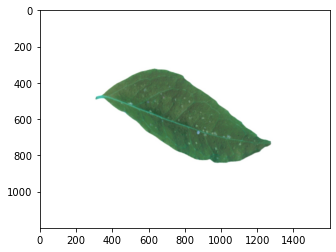

In [92]:
im = cv2.imread(bg_rem_img)
plt.imshow(im)

In [93]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.show()
    
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(gs,cmap='Greys_r')
    plt.show()
    
    blur = cv2.GaussianBlur(gs, (25,25),0)
    plt.imshow(blur,cmap='Greys_r')
    plt.show()
    
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    plt.imshow(im_bw_otsu,cmap='Greys_r')
    plt.show()
    
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    plt.imshow(closing,cmap='Greys_r')
    plt.show()

    #Shape features
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
    plt.imshow(plottedContour,cmap="Greys_r")
    plt.show()
    
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

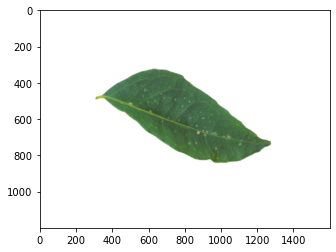

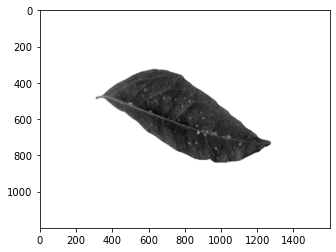

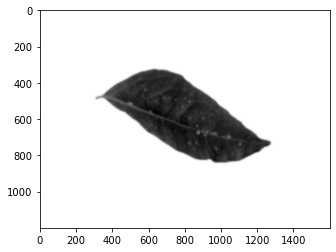

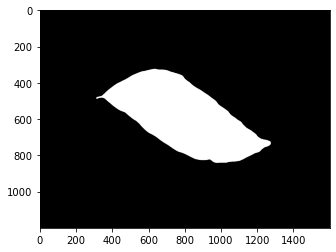

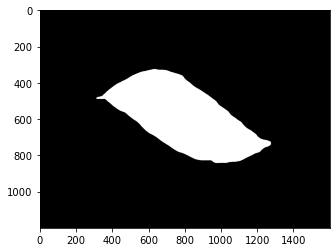

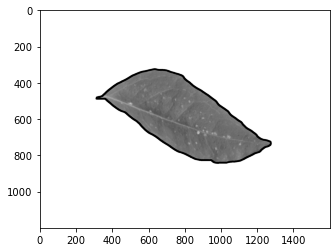

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,247144.0,2372.213536,964,517,1.864603,2.01659,22.769709,10.812039,16.21129,11.331481,30.538863,42.441529,31.921378,68.724157,0.99024,0.93756,1.706081


In [94]:
features_of_img = feature_extract(im)
features_of_img

In [95]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)

[[-1.70088459 -1.27317171 -0.4060727  -1.63217713  0.9586159   0.2572198
   0.25095053 -1.57329741 -1.40950332 -0.79882437 -1.45164512 -0.82714658
  -0.14343107  1.34069511 -3.34929312  2.38761395 -2.30632988]]


In [96]:
y_pred_clf = clf.predict(scaled_features)
y_pred_svm = svm_clf.predict(scaled_features)
y_pred_rf = rf.predict(scaled_features)
y_pred_dt = dt.predict(scaled_features)
y_pred_knn = knn.predict(scaled_features)
y_pred_xg = xg.predict(scaled_features)
y_pred_gb = gb.predict(scaled_features)
y_pred_nb = nb.predict(scaled_features)


print("svm predict:", y_pred_clf )
print("rf predict:", y_pred_rf )
print("dt predict:", y_pred_dt )
print("knn predict:", y_pred_knn )
print("xg predict:", y_pred_xg )
print("gb predict:", y_pred_gb )
print("nb predict:", y_pred_nb )
print("svm gridcv predict:", y_pred_svm )

svm predict: [10]
rf predict: [11]
dt predict: [17]
knn predict: [18]
xg predict: [8]
gb predict: [7]
nb predict: [2]
svm gridcv predict: [10]


In [50]:
common_names = ['Rasna',
                'Amaranthus Viridis (Arive-Dantu)',
                'Artocarpus Heterophyllus (Jackfruit)',
                'Azadirachta Indica (Neem)',
                'Basella Alba (Basale)',
                'Brassica Juncea (Indian Mustard)',
                'Carissa Carandas (Karanda)',
                'Citrus Limon (Lemon)',
                'Ficus Religiosa (Peepal Tree)',
                'Jasminum (Jasmine)', 
                'Murraya Koenigii (Curry)',  #10
                'Moringa Oleifera (Drumstick)',
                'Mentha(Mint)',
                'Mangifera Indica (Mango)', 
                'Nyctanthes Arbor-tristis (Parijata)',
                'Ocimum Tenuiflorum (Tulsi)',
                'Punica Granatum (Pomegranate)',
                'Syzygium Cumini (Jamun)',
                'Syzygium Jambos (Rose Apple)'
               ]

In [51]:
common_names[y_pred_clf[0]]

'Ficus Religiosa (Peepal Tree)'